# Teste na primeira aula para visualizar o problema

In [26]:
import pandas as pd

In [27]:
data = pd.read_csv('data/imdb-reviews-pt-br.csv')

In [28]:
data.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [29]:
from sklearn.model_selection import train_test_split

treino_x, teste_x, treino_y, teste_y = train_test_split(data.text_pt, data.sentiment, random_state=40)

In [30]:
from sklearn.linear_model import LogisticRegression

# regressao = LogisticRegression()
# regressao.fit(treino_x, treino_y)
# acuracia = regressao.score(teste_x, teste_y)

# print(acuracia)

print("Se quiser fazer o teste desses comandos é só tirar os comentários, mas onde ele vai retornar o erro abaixo:")
print("""
      could not convert string to float: 'O segundo episódio oficial da série 
      "Columbo" "Murder by the Book", filmado mais tarde, atingiu primeiro as ondas. 
      Robert Culp, que combinaria com o detetive Peter Falks em várias parcelas futuras, 
      é fantástico como o cabeça-dura de uma sofisticada agência de detetives que mata uma 
      cliente quando ela se recusa a aceitar seus esquemas de chantagem. As duas estrelas são bem 
      combinadas neste exercício inteligente de gato e rato que é um dos melhores da série.'
      """)

Se quiser fazer o teste desses comandos é só tirar os comentários, mas onde ele vai retornar o erro abaixo:

      could not convert string to float: 'O segundo episódio oficial da série 
      "Columbo" "Murder by the Book", filmado mais tarde, atingiu primeiro as ondas. 
      Robert Culp, que combinaria com o detetive Peter Falks em várias parcelas futuras, 
      é fantástico como o cabeça-dura de uma sofisticada agência de detetives que mata uma 
      cliente quando ela se recusa a aceitar seus esquemas de chantagem. As duas estrelas são bem 
      combinadas neste exercício inteligente de gato e rato que é um dos melhores da série.'
      


In [31]:
# Visualizamos o problema para que tenhamos que tratar as strings para que o modelo consiga trabalhar

# primeiro então vamos preparar a nossa classificação das features  

In [32]:
# anaisando primeiro um elemento

print("Analise negativa")
data.text_pt[456]

Analise negativa


'Uma família Um adolescente, sua mãe e um padrasto, cansado da vida na cidade, decide se mudar para as montanhas para se afastar de tudo e ter um novo começo. No entanto, seu idílio é quebrado por três irmãos e seu pai dominador, que não aceitam gentilmente os recém-chegados em seu caminho. Embora ter objetos jogados pela janela e ser ameaçado na rua seja apenas o começo, o jovem decide piorar as coisas tendo um relacionamento com a terrível irmã trio. Com a lei pouco disposta a fazer nada a respeito e a violência aumentando rapidamente, o rapaz decide resolver o problema com suas próprias mãos. Vingando descontroladamente entre hilaridade e maldade, esse é um dos filmes de exploração mais estranhos já feitos. No começo, você pode rir com a atuação indelicada e o diálogo ridículo dado aos personagens, especialmente os bandidos exaustos. Mas então, você tem cenas completamente desnecessárias como uma mãe sendo estuprada enquanto seu filho é forçado a assistir, ou a irmã dos bandidos sen

In [33]:
# quantas avaliações negativas e postivas termos
data.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [34]:
# podemos perceber que os dados estão bem balanceados para um bom treino, agora vamos organizar as classificações entre 0 e 1
# usando um dict no replace

data['classificacao'] = data.sentiment.replace({'neg': 0, 'pos': 1})

In [35]:
data

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [36]:
# usar a função DataFrame.sparse.from_spmatrix

In [37]:
# criando o nosso bag_of_words

from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer()

bag_of_words = vetorizar.fit_transform(texto)

In [38]:
bag_of_words 

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [39]:
vetorizar.get_feature_names()

C:\Users\Rado\anaconda3\envs\estudos\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['assisti', 'filme', 'ruim', 'um', 'ótimo']

In [40]:
# criando um dataframe com o bag_of_words

matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns = vetorizar.get_feature_names())

In [41]:
matriz_esparsa

,assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [42]:
# agora vamos vetorizar a nossa data

vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(data.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [43]:
treino_x, teste_x, treino_y, teste_y = train_test_split(bag_of_words, data.classificacao, random_state=42)

regressao = LogisticRegression()
regressao.fit(treino_x, treino_y)
acuracia = regressao.score(teste_x, teste_y)

print(acuracia)

0.6583097452486858


In [44]:
# Criando uma função para o modelo

def classificar_texto(texto, coluna_texto, coluna_classificacao):
    """texto: dataset
    coluna_texto: coluna com os valores para vetorizar
    coluna_classificacao: coluna com os valores de classificação
    """
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino_x, teste_x, treino_y, teste_y = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression(solver = "lbfgs")
    regressao_logistica.fit(treino_x, treino_y)
    return regressao_logistica.score(teste_x, teste_y)

print(classificar_texto(data, "text_pt", "classificacao"))

0.6583097452486858


In [51]:
# Agora é hora de melhorar a visualização

In [45]:
# Vamos preparar agora uma visualização das palavras mais frequêntes nas resenhas
from wordcloud import WordCloud

todas_palavras = [textos for textos in data.text_pt]

len(todas_palavras)

49459

In [46]:
todas_palavras = ' '.join([textos for textos in data.text_pt])

len(todas_palavras)

63448424

In [56]:
nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations = False).generate(todas_palavras)

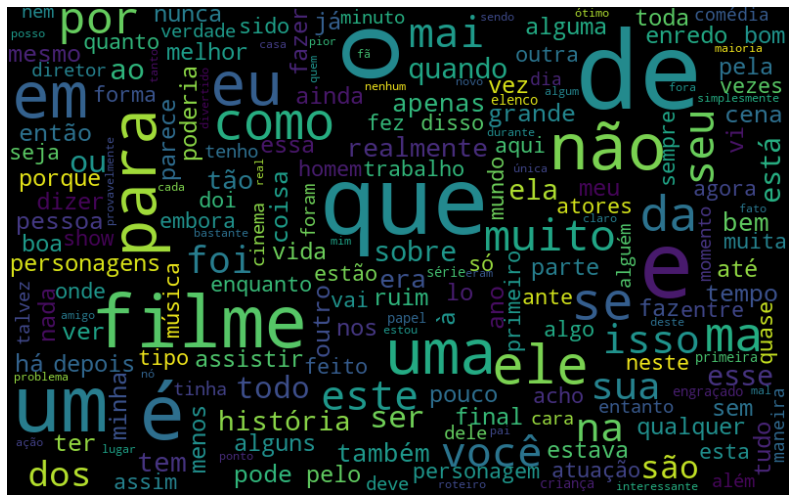

In [62]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
plt.imshow(nuvem_de_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()


In [66]:
# iniciando separação da nuvem de palavras para as positivas e negativas

data.query("classificacao == 1")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [67]:
# agora vamos criar uma função para plotar sos graficos da nuvem de plavras das analises positivas e negativas

def nuvem_de_palavras(texto, coluna, query):
    palavras_sep = texto.query(query)
    
    todas_palavras = ' '.join([textos for textos in palavras_sep[coluna]])

    nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations = False).generate(todas_palavras)

    plt.figure(figsize=(14,10))
    plt.imshow(nuvem_de_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

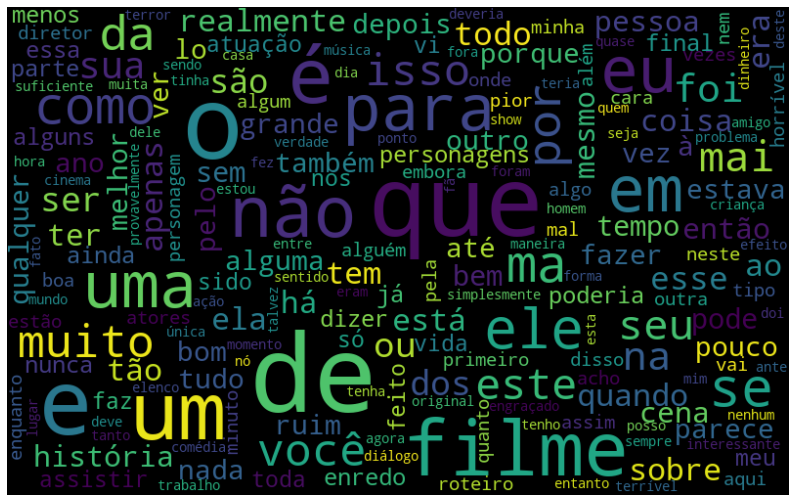

In [70]:
# Testando a função

nuvem_de_palavras(data, 'text_pt', "sentiment == 'neg'")

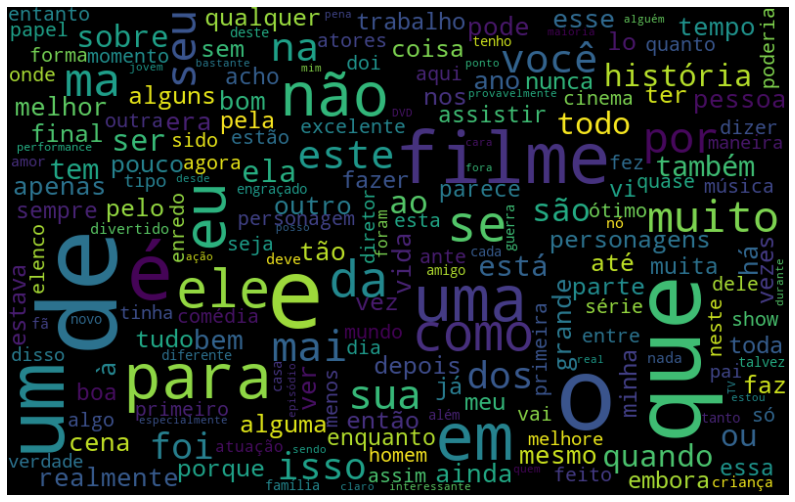

In [71]:
nuvem_de_palavras(data, 'text_pt', "sentiment == 'pos'")

In [72]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Rado\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Rado\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Rado\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\Rado\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\Rado\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\Rado\AppData\Roaming\nltk_data...
[nltk_data] 

[nltk_data]    |   Unzipping corpora\pros_cons.zip.
[nltk_data]    | Downloading package qc to
[nltk_data]    |     C:\Users\Rado\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\qc.zip.
[nltk_data]    | Downloading package reuters to
[nltk_data]    |     C:\Users\Rado\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package rte to
[nltk_data]    |     C:\Users\Rado\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\rte.zip.
[nltk_data]    | Downloading package semcor to
[nltk_data]    |     C:\Users\Rado\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     C:\Users\Rado\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\senseval.zip.
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     C:\Users\Rado\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\sentiwordnet.zip.
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     C:\U

[nltk_data]    |   Unzipping misc\perluniprops.zip.
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\Rado\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\Rado\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package porter_test to
[nltk_data]    |     C:\Users\Rado\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping stemmers\porter_test.zip.
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\Rado\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\Rado\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping misc\mwa_ppdb.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection all


True

In [73]:
from nltk import tokenize

token_spaco = tokenize.WhitespaceTokenizer()
token_frase = token_spaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [74]:
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})

In [75]:
df_frequencia

,Palavra,Frequência
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741
...,...,...
348280,"Muppified,",1
348281,inventora,1
348282,"""Union",1
348283,beirar,1


In [76]:
df_frequencia.nlargest(columns = "Frequência", n = 10)

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


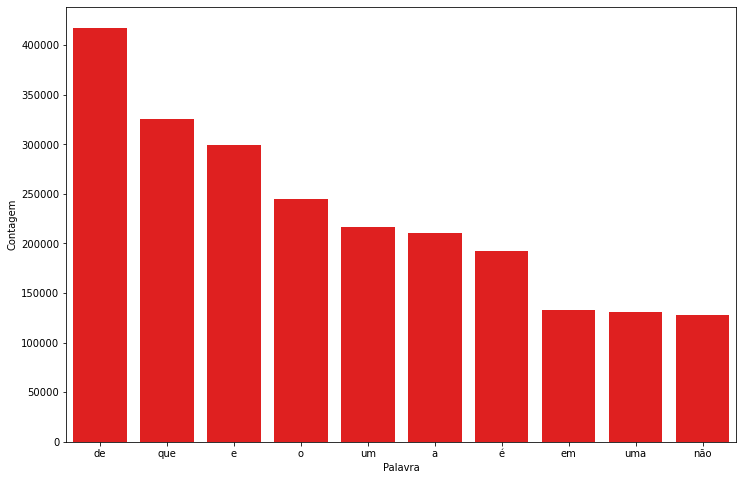

In [78]:
import seaborn as sns

plt.figure(figsize=(12,8))

ax = sns.barplot(x = 'Palavra', y='Frequência', color='red', data = df_frequencia.nlargest(columns = "Frequência", n = 10))
ax.set(ylabel = "Contagem")

plt.show()



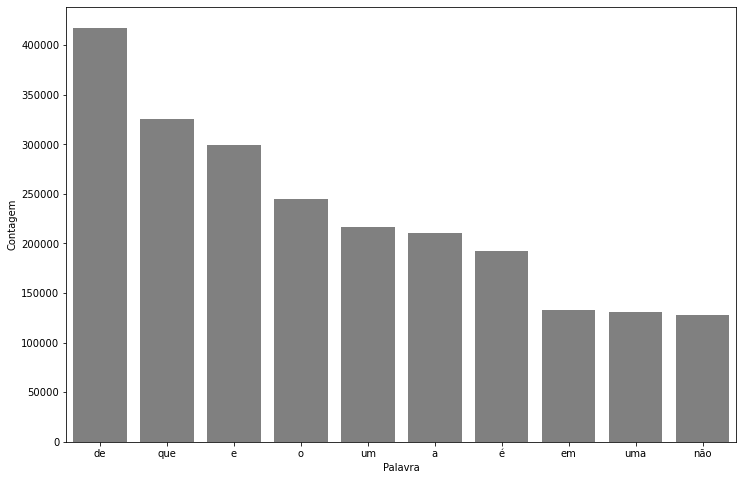

In [91]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_spaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

pareto(data, "text_pt", 10)

In [83]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

In [87]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for opiniao in data.text_pt:
    nova_frase = list()
    palavras_texto = token_spaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

data["tratamento_1"] = frase_processada

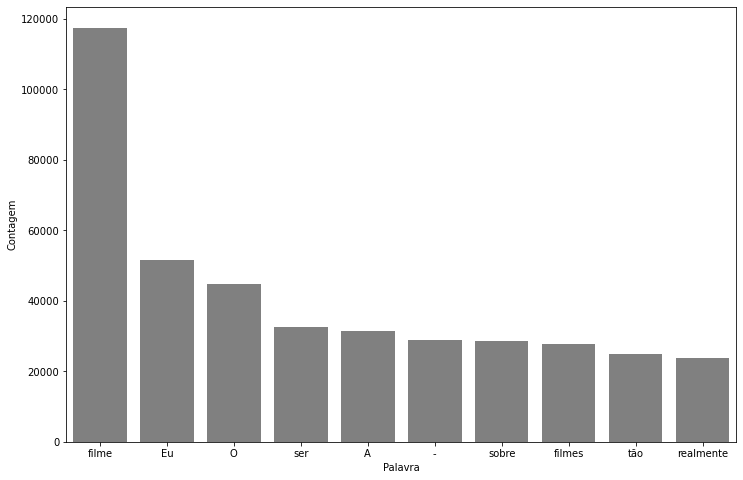

In [92]:
pareto(data,"tratamento_1", 10)

In [90]:
classificar_texto(data, "tratamento_1", "classificacao")

0.6607359482410028